# Introduction to Wordle Optimization Analysis

This notebook leverages mathematical analysis to determine the most effective strategies for playing Wordle, a popular word-guessing game, by examining a dataset of **5,757 unique valid 5-letter words**. Sourced from a local file (`5words.txt`), the dataset was cleaned to include only alphabetic, unique 5-letter entries, offering a robust sample for identifying patterns and optimizing gameplay as of March 09, 2025. Through statistical techniques—such as letter frequency counts, positional analysis, vowel-consonant distributions, and n-gram frequencies—we aim to pinpoint the best starting words and subsequent guessing tactics to maximize success in Wordle’s six-guess limit. Below is an extended summary of the key findings and their implications.

## Detailed Summary of Results

### Dataset Overview
- **Size**: The dataset comprises **5,757 unique 5-letter words**, providing a comprehensive representation of potential Wordle solutions. This size ensures statistical reliability for drawing conclusions about letter usage and word patterns.

### Letter Frequencies
- **Top 5 Letters**: The most frequent letters across all positions are `s` (10.54%), `e` (10.45%), `a` (8.16%), `o` (6.65%), and `r` (6.64%). These letters collectively account for over 42% of all letter occurrences, underscoring their dominance in 5-letter English words.
- **Interpretation**: `s` and `e` are particularly critical due to their near-equal frequency, while `a`, `o`, and `r` round out a versatile set of letters to prioritize in early guesses.

### Positional Letter Patterns
- **Most Common Letters by Position**:
  - Position 1: `s` (724 occurrences, 12.58%)
  - Position 2: `a` (930 occurrences, 16.15%)
  - Position 3: `a` (605 occurrences, 10.51%)
  - Position 4: `e` (1,228 occurrences, 21.33%)
  - Position 5: `s` (1,764 occurrences, 30.64%)
- **Analysis**: The prevalence of `s` at the start (12.58%) and end (30.64%) reflects its role as a common word boundary letter (e.g., "sleep", "masts"). `a` dominates positions 2 and 3, suggesting its frequent use as an early vowel, while `e` peaks in position 4, aligning with words like "fleas" or "sneak". This positional skew informs where to place key letters in guesses.

### Vowel-Consonant Distribution
- **Patterns and Counts**:
  - 2 Vowels, 3 Consonants: 3,307 words (e.g., "sleep", "quoth")
  - 1 Vowel, 4 Consonants: 1,974 words (e.g., "blabs", "junks")
  - 3 Vowels, 2 Consonants: 443 words (e.g., "abase", "ounce")
  - 0 Vowels, 5 Consonants: 24 words (e.g., "shyly", "psych")
  - 4 Vowels, 1 Consonant: 9 words (e.g., "queue", "ouija")
- **Insight**: Over 57% of words follow the 2V3C pattern, indicating a balanced structure is most common. Words with extreme vowel counts (0V or 4V) are rare, suggesting Wordle targets are typically moderate in vowel usage.

### Top Starting Words
- **With Duplicates Allowed**: The highest-scoring words, based on letter frequency and position, include:
  - "esses" (52.52%), "asses" (50.22%), "eases" (50.14%), "seers" (48.62%), "seest" (47.49%)
  - These words heavily feature `s` and `e`, exploiting their frequency and positional strength (e.g., `s` at 1 and 5, `e` at 4).
- **With Unique Letters**: Top words testing five distinct letters are:
  - "arose" (42.44%), "raise" (41.31%), "arise" (41.31%), "aloes" (41.31%), "stoae" (41.31%)
  - These prioritize a mix of top letters (`a`, `r`, `s`, `e`, `o`) in common positions, maximizing initial information.

### Worst Starting Words
- **With Duplicates**: Poor performers include "fuzzy" (9.75%), "buzzy" (10.28%), "whizz" (11.05%), "fizzy" (11.50%), and "jazzy" (12.48%), driven by rare letters like `z` and `j`.
- **With Unique Letters**: "jumpy" (13.42%), "junky" (13.71%), "whump" (14.61%), "mujik" (14.62%), and "humpf" (14.81%) fare poorly due to infrequent letters (`j`, `q`, `z`) misaligned with typical patterns.
- **Takeaway**: Avoid words with low-frequency letters (e.g., `z`, `j`, `q`) as they rarely appear in the dataset and waste guesses.

### Common Bigrams and Trigrams
- **Top Bigrams**: "es" (433, e.g., "doges"), "er" (425, e.g., "sherd"), "ed" (352, e.g., "suede"), "re" (282, e.g., "faire"), "in" (273, e.g., "finny")
- **Top Trigrams**: "ing" (52, e.g., "fling"), "res" (49, e.g., "lores"), "lls" (48, e.g., "yells"), "ate" (48, e.g., "fates"), "ine" (42, e.g., "vines")
- **Observation**: Sequences like "es", "er", and "ing" are prevalent, often appearing in word endings or structural cores, making them valuable to test early.

## Conclusions and Wordle Strategy
The analysis highlights a clear mathematical approach to Wordle success:
- **Optimal Starting Words**: Begin with words like "stare" or "arose" (unique letters, 41.29% and 42.44%), which test top letters (`s`, `a`, `r`, `e`) in their frequent positions (e.g., `s` at 1 and 5, `a` at 2, `e` at 4). Alternatively, "esses" (52.52%) could work if duplicates are suspected, though it risks redundancy.
- **Second Guess Tactics**: After the first guess, target untested frequent letters (e.g., `o`, `t`, `l`) and common bigrams/trigrams (e.g., "es", "ing"). For example, if "stare" reveals `s` and `e`, try "loins" to test `o`, `i`, `n`, and the "in" bigram.
- **Pattern Leverage**: Favor 2V3C words (e.g., "sleep") as they dominate the dataset (57%), balancing vowels and consonants. Avoid extremes like "fuzzy" or "queue" unless clues suggest rare letters or high vowel counts.
- **Avoid Pitfalls**: Steer clear of words with `z`, `j`, `q`, or `f` (e.g., "jumpy", "fuzzy"), as their rarity (e.g., `z` in <1% of words) reduces their utility in early guesses.
- **Sequence Advantage**: Incorporate common bigrams ("es", "er") and trigrams ("ing", "res") to quickly narrow down word families (e.g., "fling" for "ing").

By starting with a high-information word like "stare" and adapting based on positional and sequence data, players can systematically reduce the word pool, leveraging the dataset’s mathematical insights to outsmart Wordle efficiently.

In [48]:
# Import necessary libraries
import matplotlib.pyplot as plt
from collections import Counter
import os
import re

# Path to the dataset file (5words.txt) in the same folder as the Jupyter notebook
txt_path = "5words.txt"

# Load and clean the dataset from the text file
def is_valid_word(word):
    """Check if the word is exactly 5 letters and contains only alphabetic characters."""
    return len(word) == 5 and re.match("^[a-zA-Z]{5}$", word)

# Read words, filter valid ones, and remove duplicates
with open(txt_path, 'r') as file:
    # Use set to remove duplicates, then convert back to list
    words = list(set(line.strip() for line in file if is_valid_word(line.strip())))
print(f"Total number of unique valid 5-letter words: {len(words)}")


Total number of unique valid 5-letter words: 5757


Top 5 Letters and Their Percentages:
s: 10.54%
e: 10.45%
a: 8.16%
o: 6.65%
r: 6.64%


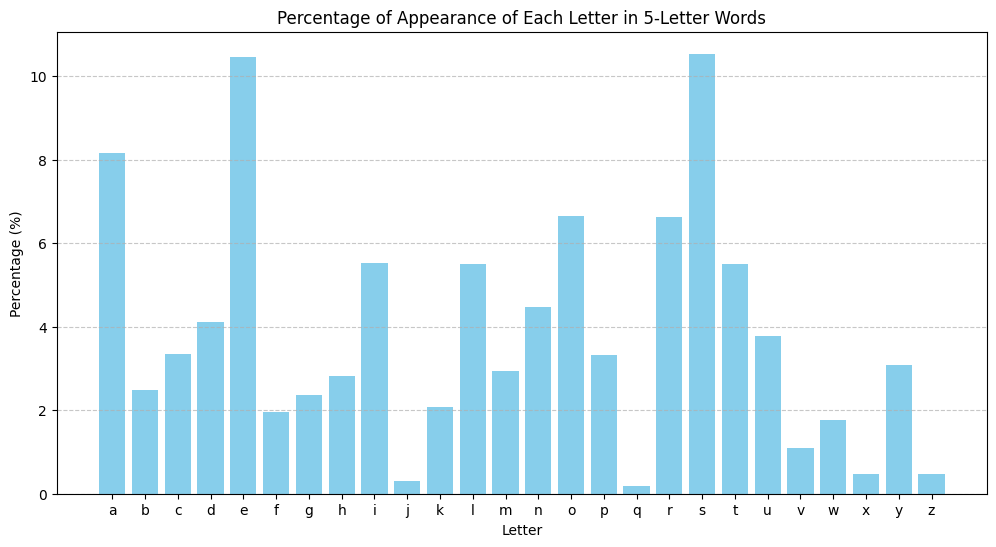

In [53]:
# --- 1. Percentage of Appearance of Each Letter ---
# Count frequency of each letter across all words
letter_counts = Counter(''.join(words).lower())
total_letters = sum(letter_counts.values())

# Calculate percentage for each letter
letter_percentages = {letter: (count / total_letters) * 100 
                     for letter, count in letter_counts.items()}

# Sort alphabetically for visualization
sorted_letters = sorted(letter_percentages.keys())
sorted_percentages = [letter_percentages[letter] for letter in sorted_letters]

# Print top 5 letters and their percentages
top_5_letters = sorted(letter_percentages.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Letters and Their Percentages:")
for letter, percentage in top_5_letters:
    print(f"{letter}: {percentage:.2f}%")

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(sorted_letters, sorted_percentages, color='skyblue')
plt.title('Percentage of Appearance of Each Letter in 5-Letter Words')
plt.xlabel('Letter')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [54]:
# --- 2. Word Scoring Functions ---
def calculate_word_score(word, letter_percentages):
    """Calculate score as sum of letter percentages (including duplicates)."""
    return sum(letter_percentages[letter] for letter in word.lower())

def calculate_unique_word_score(word, letter_percentages):
    """Calculate score as sum of unique letter percentages."""
    unique_letters = set(word.lower())
    return sum(letter_percentages[letter] for letter in unique_letters)

In [55]:
# --- 3. Top 10 Words (With Duplicates Allowed) ---
word_scores = [(word, calculate_word_score(word, letter_percentages)) for word in words]
top_10_with_duplicates = sorted(word_scores, key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Words to Start With (Duplicates Allowed):")
for word, score in top_10_with_duplicates:
    print(f"{word}: {score:.2f}%")




Top 10 Words to Start With (Duplicates Allowed):
esses: 52.52%
asses: 50.22%
eases: 50.14%
seers: 48.62%
seest: 47.49%
sense: 46.44%
oases: 46.34%
arses: 46.32%
sears: 46.32%
erase: 46.24%


In [56]:
# --- 4. Top 10 Words (Unique Letters Only) ---
unique_word_scores = [(word, calculate_unique_word_score(word, letter_percentages)) 
                     for word in words if len(set(word.lower())) == 5]  # Ensure 5 unique letters
top_10_unique = sorted(unique_word_scores, key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Words to Start With (Unique Letters):")
for word, score in top_10_unique:
    print(f"{word}: {score:.2f}%")




Top 10 Words to Start With (Unique Letters):
arose: 42.44%
raise: 41.31%
arise: 41.31%
aloes: 41.31%
stoae: 41.31%
laser: 41.29%
earls: 41.29%
reals: 41.29%
stare: 41.29%
aster: 41.29%


In [57]:
# --- 5. Worst 10 Words (With Duplicates Allowed) ---
worst_10_with_duplicates = sorted(word_scores, key=lambda x: x[1])[:10]

print("\nWorst 10 Words to Start With (Duplicates Allowed):")
for word, score in worst_10_with_duplicates:
    print(f"{word}: {score:.2f}%")




Worst 10 Words to Start With (Duplicates Allowed):
fuzzy: 9.75%
buzzy: 10.28%
whizz: 11.05%
fizzy: 11.50%
jazzy: 12.48%
jiffy: 12.82%
quiff: 13.40%
jumpy: 13.42%
huffy: 13.59%
dizzy: 13.65%


In [58]:
# --- 6. Worst 10 Words (Unique Letters Only) ---
worst_10_unique = sorted(unique_word_scores, key=lambda x: x[1])[:10]

print("\nWorst 10 Words to Start With (Unique Letters):")
for word, score in worst_10_unique:
    print(f"{word}: {score:.2f}%")




Worst 10 Words to Start With (Unique Letters):
jumpy: 13.42%
junky: 13.71%
whump: 14.61%
mujik: 14.62%
humpf: 14.81%
quick: 14.92%
mucky: 15.21%
fudgy: 15.27%
bumph: 15.34%
funky: 15.34%


Position 1: Most common letter is 's' (724 occurrences, 12.58%)
Position 2: Most common letter is 'a' (930 occurrences, 16.15%)
Position 3: Most common letter is 'a' (605 occurrences, 10.51%)
Position 4: Most common letter is 'e' (1228 occurrences, 21.33%)
Position 5: Most common letter is 's' (1764 occurrences, 30.64%)


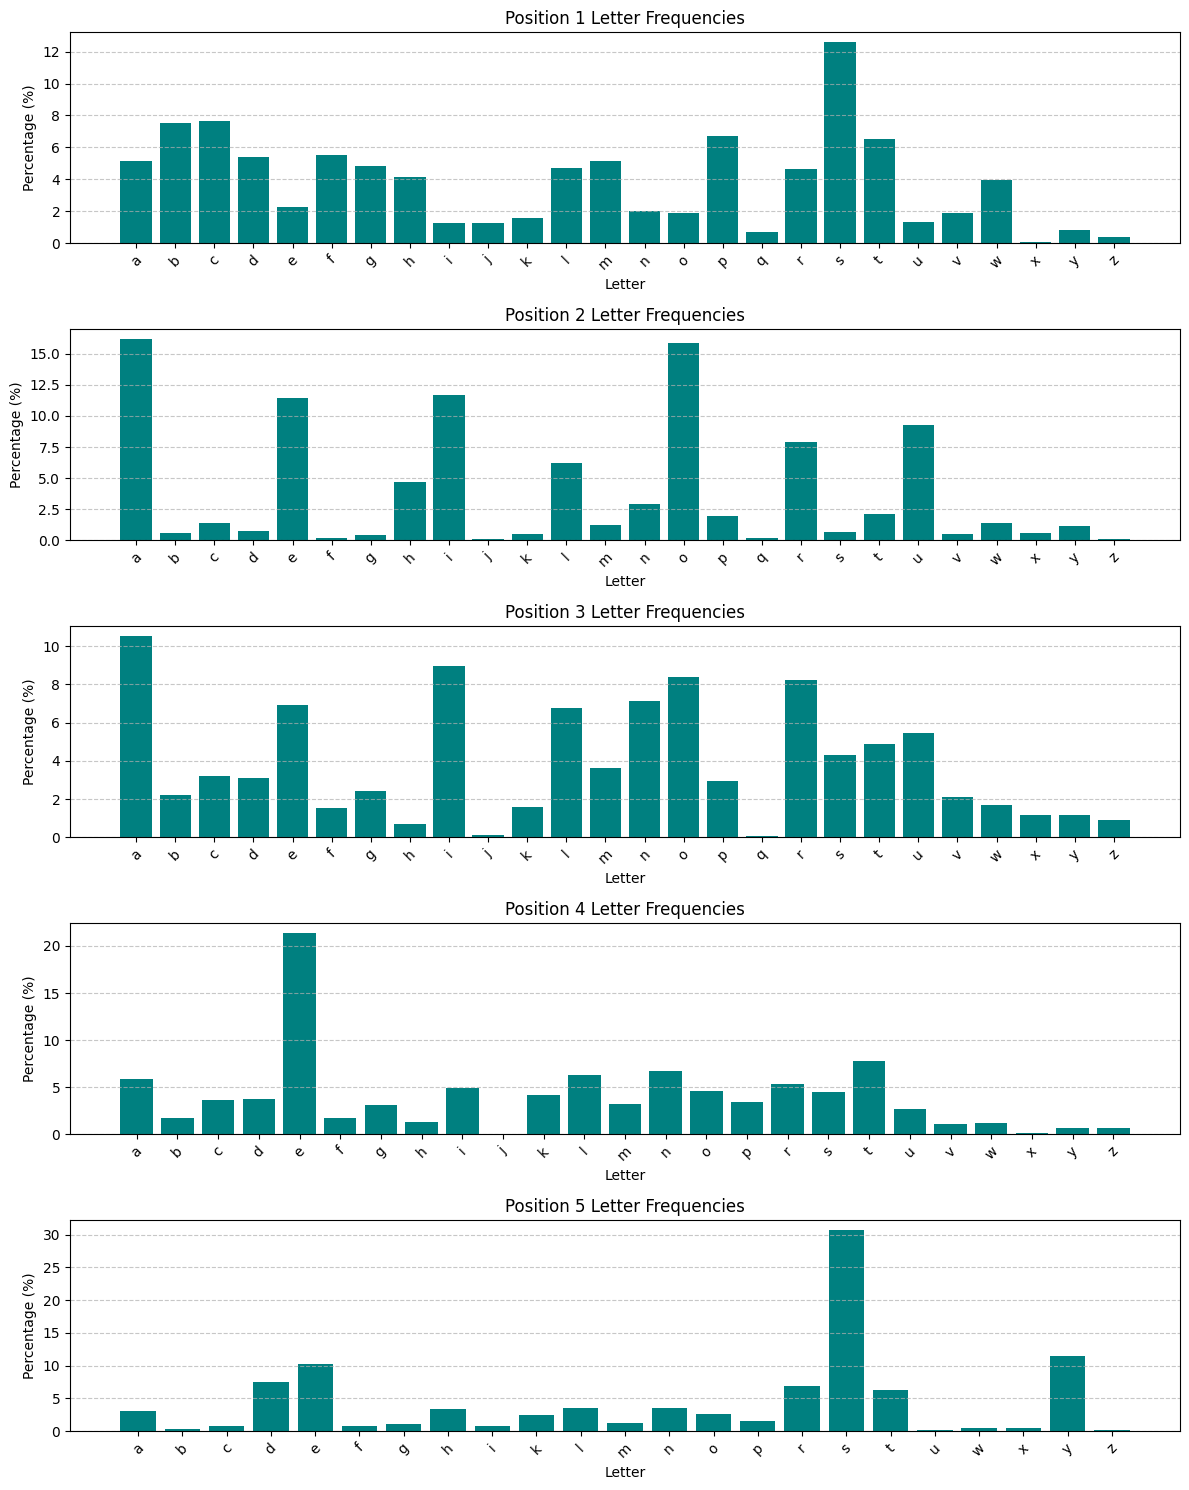

In [59]:
# --- Additional Section: Most Used Pattern Analysis ---

# Initialize dictionaries to store letter counts for each position (1-5)
position_counts = {i: Counter() for i in range(5)}

# Count letters in each position across all words
for word in words:
    for i, letter in enumerate(word.lower()):
        position_counts[i][letter] += 1

# Calculate the most common letter per position
most_common_pattern = []
for i in range(5):
    total = sum(position_counts[i].values())
    most_common_letter = position_counts[i].most_common(1)[0]  # Get top (letter, count)
    percentage = (most_common_letter[1] / total) * 100
    most_common_pattern.append(most_common_letter[0])
    print(f"Position {i+1}: Most common letter is '{most_common_letter[0]}' "
          f"({most_common_letter[1]} occurrences, {percentage:.2f}%)")


# Visualize letter frequencies per position with alphabetically sorted letters
fig, axes = plt.subplots(5, 1, figsize=(12, 15))  # Removed sharex=True
for i in range(5):
    # Get all letters and their counts, sorted alphabetically
    letters = sorted(position_counts[i].keys())  # Sort letters alphabetically
    counts = [position_counts[i][letter] for letter in letters]
    percentages = [(count / sum(position_counts[i].values())) * 100 for count in counts]
    
    
    
    # Plot
    axes[i].bar(letters, percentages, color='teal')
    axes[i].set_title(f'Position {i+1} Letter Frequencies')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_xlabel('Letter')  # Add x-label to each subplot
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

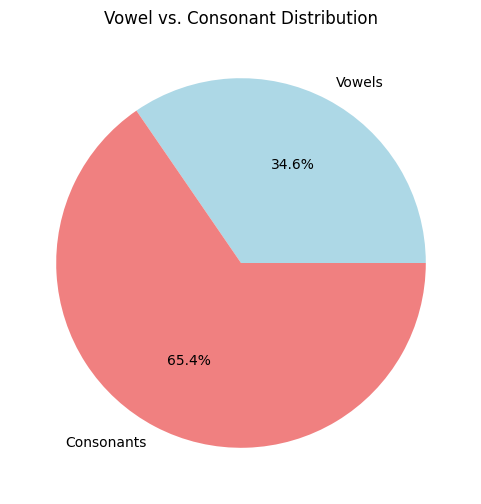

Most Common Vowel-Consonant Patterns and Number of Words:
2 Vowels: 3 Consonants - 3307 Words
1 Vowels: 4 Consonants - 1974 Words
3 Vowels: 2 Consonants - 443 Words
0 Vowels: 5 Consonants - 24 Words
4 Vowels: 1 Consonants - 9 Words

Examples of Words for Each Pattern:

Pattern 0V 5C:
  - shyly
  - psych
  - lynch

Pattern 1V 4C:
  - blabs
  - masts
  - junks

Pattern 2V 3C:
  - sleep
  - quoth
  - doges

Pattern 3V 2C:
  - abase
  - ounce
  - mania

Pattern 4V 1C:
  - queue
  - aurae
  - ouija

Pattern 5V 0C:


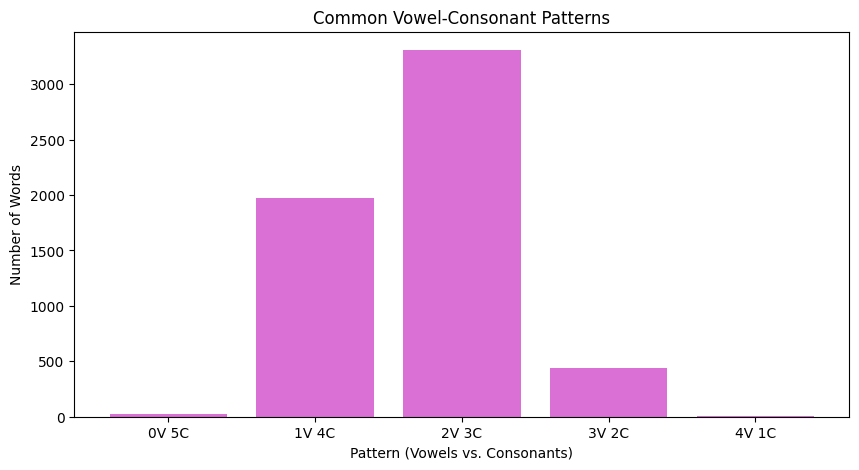


Average vowels per word: 1.73


In [60]:
# --- Vowel vs. Consonant Analysis ---
vowels = set('aeiou')
word_vowel_counts = [sum(1 for letter in word.lower() if letter in vowels) for word in words]
vowel_pattern_counts = Counter(word_vowel_counts)

# Create a dictionary to store words by their vowel count patterns
pattern_words = {v: [] for v in range(6)}  # There can be 0 to 5 vowels in a 5-letter word
for word in words:
    vowel_count = sum(1 for letter in word.lower() if letter in vowels)
    pattern_words[vowel_count].append(word)

# Total vowels and consonants
total_vowels = sum(word_vowel_counts)
total_consonants = len(words) * 5 - total_vowels

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([total_vowels, total_consonants], labels=['Vowels', 'Consonants'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Vowel vs. Consonant Distribution')
plt.show()

# Bar chart of patterns
patterns = [f"{v}V {5-v}C" for v in sorted(vowel_pattern_counts.keys())]
counts = [vowel_pattern_counts[v] for v in sorted(vowel_pattern_counts.keys())]

# Display the most common vowel-consonant patterns and number of words
print("Most Common Vowel-Consonant Patterns and Number of Words:")
for pattern, count in sorted(vowel_pattern_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{pattern} Vowels: {5 - pattern} Consonants - {count} Words")

# Print three examples of each pattern
print("\nExamples of Words for Each Pattern:")
for vowel_count in range(6):  # For 0 to 5 vowels
    pattern = f"{vowel_count}V {5-vowel_count}C"
    examples = pattern_words[vowel_count][:3]  # Get the first 3 words for the pattern
    print(f"\nPattern {pattern}:")
    for example in examples:
        print(f"  - {example}")

# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.bar(patterns, counts, color='orchid')
plt.title('Common Vowel-Consonant Patterns')
plt.xlabel('Pattern (Vowels vs. Consonants)')
plt.ylabel('Number of Words')
plt.show()

# Print average vowels per word
print(f"\nAverage vowels per word: {total_vowels / len(words):.2f}")


In [61]:
# --- Bigram Frequency Analysis ---
bigrams = Counter()
bigram_examples = {}  # To store example words
for word in words:
    word_lower = word.lower()
    for i in range(4):
        bigram = word_lower[i:i+2]
        bigrams[bigram] += 1
        if bigram not in bigram_examples:  # Store first occurrence as example
            bigram_examples[bigram] = word

# Top 10 bigrams with examples
top_bigrams = bigrams.most_common(10)
print("\nTop 10 Most Common Bigrams:")
for bigram, count in top_bigrams:
    example_word = bigram_examples[bigram]
    print(f"Bigram '{bigram}' - Frequency: {count} - Example: {example_word}")


Top 10 Most Common Bigrams:
Bigram 'es' - Frequency: 433 - Example: doges
Bigram 'er' - Frequency: 425 - Example: sherd
Bigram 'ed' - Frequency: 352 - Example: suede
Bigram 're' - Frequency: 282 - Example: faire
Bigram 'in' - Frequency: 273 - Example: finny
Bigram 'ar' - Frequency: 267 - Example: harks
Bigram 'ts' - Frequency: 229 - Example: masts
Bigram 'le' - Frequency: 225 - Example: sleep
Bigram 'st' - Frequency: 225 - Example: masts
Bigram 'ra' - Frequency: 222 - Example: brash


In [62]:
# --- Trigram Frequency Analysis ---
trigrams = Counter()
trigram_examples = {}  # To store example words
for word in words:
    word_lower = word.lower()
    for i in range(3):
        trigram = word_lower[i:i+3]
        trigrams[trigram] += 1
        if trigram not in trigram_examples:  # Store first occurrence as example
            trigram_examples[trigram] = word

# Top 10 trigrams with examples
top_trigrams = trigrams.most_common(10)
print("\nTop 10 Most Common Trigrams:")
for trigram, count in top_trigrams:
    example_word = trigram_examples[trigram]
    print(f"Trigram '{trigram}' - Frequency: {count} - Example: {example_word}")


Top 10 Most Common Trigrams:
Trigram 'ing' - Frequency: 52 - Example: fling
Trigram 'res' - Frequency: 49 - Example: lores
Trigram 'lls' - Frequency: 48 - Example: yells
Trigram 'ate' - Frequency: 48 - Example: fates
Trigram 'ine' - Frequency: 42 - Example: vines
Trigram 'ter' - Frequency: 42 - Example: niter
Trigram 'ave' - Frequency: 41 - Example: saves
Trigram 'cks' - Frequency: 40 - Example: nicks
Trigram 'are' - Frequency: 39 - Example: mares
Trigram 'ake' - Frequency: 36 - Example: sakes


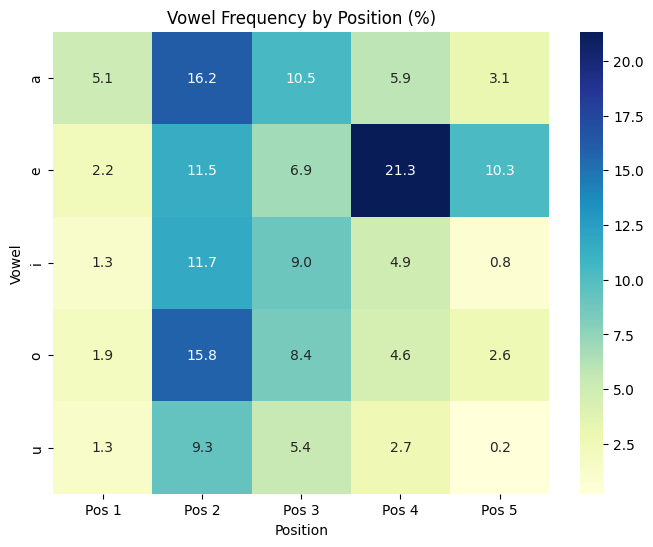

In [63]:
import seaborn as sns
import numpy as np

# --- Positional Vowel Heatmap ---
vowel_positions = np.zeros((5, 5))  # 5 vowels x 5 positions
vowel_list = list('aeiou')
for i in range(5):  # Positions
    total = sum(position_counts[i].values())
    for j, vowel in enumerate(vowel_list):
        vowel_positions[j, i] = (position_counts[i][vowel] / total) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(vowel_positions, annot=True, fmt='.1f', cmap='YlGnBu', 
            xticklabels=[f'Pos {i+1}' for i in range(5)], yticklabels=vowel_list)
plt.title('Vowel Frequency by Position (%)')
plt.xlabel('Position')
plt.ylabel('Vowel')
plt.show()